In [137]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
from sklearn.exceptions import DataConversionWarning
# Filter out warnings from sklearn and scipy
warnings.filterwarnings("ignore", category=DataConversionWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

In [138]:
df = pd.read_csv('Fraud.csv')

In [139]:
df.head(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


- we are going to drop step,nameOrig,nameDest columns because these columns is not contributing in Target Variable.

In [140]:
# we know step, nameOrig , nameDest is not important so we are going to remove 
df = df.drop(columns=['step','nameOrig','nameDest'],axis=1)

In [141]:
df.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,0
1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,0
2,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,0
3,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,0
4,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,0


In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 8 columns):
 #   Column          Dtype  
---  ------          -----  
 0   type            object 
 1   amount          float64
 2   oldbalanceOrg   float64
 3   newbalanceOrig  float64
 4   oldbalanceDest  float64
 5   newbalanceDest  float64
 6   isFraud         int64  
 7   isFlaggedFraud  int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 388.3+ MB


In [143]:
df.isnull().sum()

type              0
amount            0
oldbalanceOrg     0
newbalanceOrig    0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

- Dataset is not contain Any Missing Value 

In [144]:
df.type.unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [145]:
df.type.value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

### Encoding 
- to convert text data into numeric data we have to Encoding
- so Here I Apply One Hot Encoder

In [146]:
from sklearn.preprocessing import OneHotEncoder
df = pd.get_dummies(df, columns=['type'],drop_first=True)

In [147]:
df.isFraud.value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

- Our Dataset is not having Any missing value
- from Above you can see that the dataset is highly inbalance data 
- so we are going to apply undersampling technique to deal with inbalance data

### Scaling 
- To Bring all the Data into same scale we have to do Scaling
- so Here I Apply Min-Max Scaler

In [148]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_scaler= scaler.fit_transform(df)

In [149]:
df = pd.DataFrame(df_scaler, columns=df.columns)

In [150]:
df.head()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,0.000106,0.002855,0.003233,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.000020,0.000357,0.000391,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.000002,0.000003,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.000002,0.000003,0.000000,0.000059,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.000126,0.000697,0.000603,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0


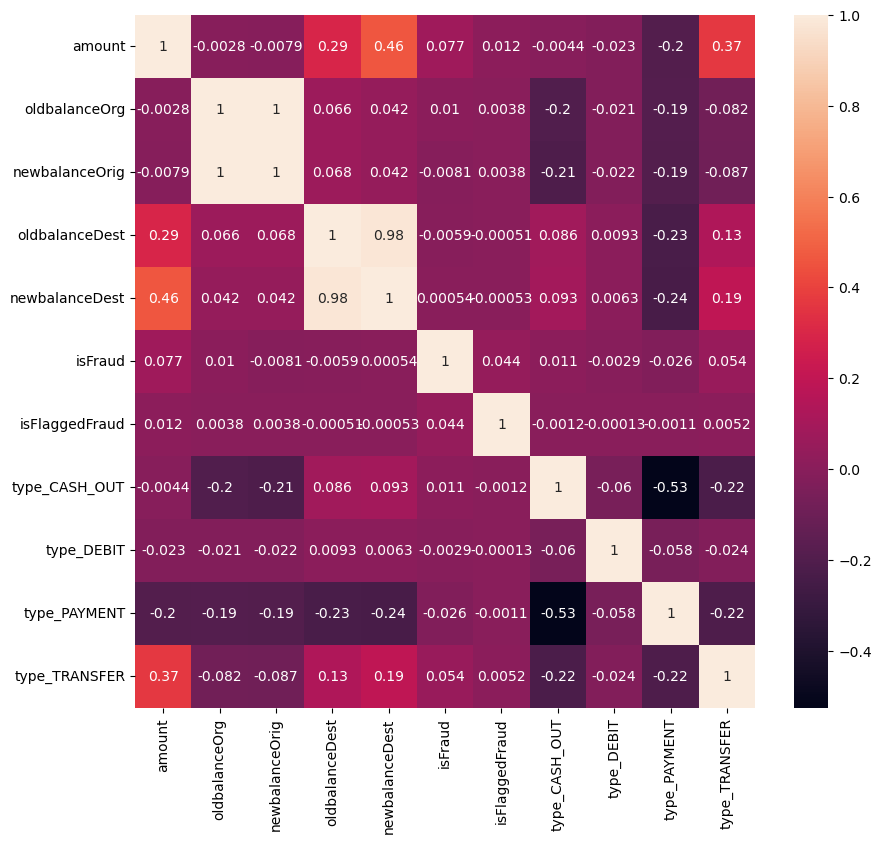

In [152]:
plt.figure(figsize=(10,9))
sns.heatmap(df.corr(),annot=True)
plt.show()

### Separate X and Y

In [153]:
X = df.drop(columns=['isFraud'],axis=1)

In [154]:
y= df['isFraud']

### Apply Under Sampling Technique
- Here we install imblearn library for under sampling

In [155]:
!pip install imblearn

In [156]:
from imblearn.under_sampling import RandomUnderSampler
rs = RandomUnderSampler(random_state=42)
x_new,y_new = rs.fit_resample(X,y)  

In [157]:
y_new.value_counts()

0.0    8213
1.0    8213
Name: isFraud, dtype: int64

### Train-Test-Split

In [158]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x_new,y_new,test_size=0.3,random_state=42)

### Logistic Regression

In [159]:
# Modeling
from sklearn.linear_model import LogisticRegression 
log_model = LogisticRegression()
log_model.fit(X_train,y_train)

# Prediction
ypred_train = log_model.predict(X_train)
ypred_test = log_model.predict(X_test)

# Evaluation
from sklearn.metrics import accuracy_score
print('Train Accuracy = ',accuracy_score(y_train,ypred_train))
print('Test Accuracy = ',accuracy_score(y_test,ypred_test))

print('-'*50)

# Cross Validation Score
scores = cross_val_score(log_model,x_new,y_new,cv=5)
print('cross validation score = ',  scores.mean())   

Train Accuracy =  0.787528265785354
Test Accuracy =  0.7717126623376623
--------------------------------------------------
cross validation score =  0.7844268429044023


In [160]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,ypred_test))

[[1361 1118]
 [   7 2442]]


In [161]:
from sklearn.metrics import classification_report
print(classification_report(y_test,ypred_test))

              precision    recall  f1-score   support

         0.0       0.99      0.55      0.71      2479
         1.0       0.69      1.00      0.81      2449

    accuracy                           0.77      4928
   macro avg       0.84      0.77      0.76      4928
weighted avg       0.84      0.77      0.76      4928



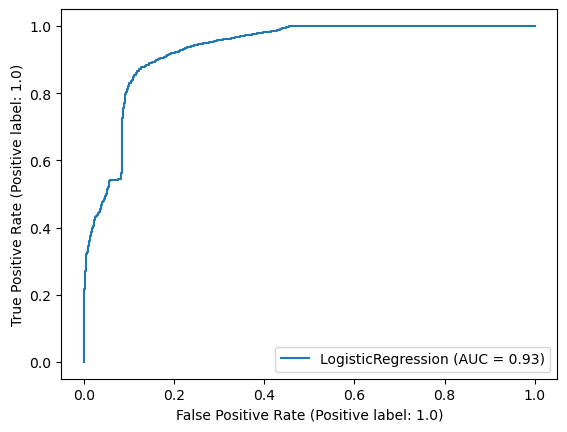

In [162]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(log_model,X_test,y_test)
plt.show()

### KNN 

In [163]:
# Modeling
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()
knn_model.fit(X_train,y_train)

# Prediction
ypred_train = knn_model.predict(X_train)
ypred_test = knn_model.predict(X_test)

#Evaluation
print('train accuracy = ', accuracy_score(y_train,ypred_train))
print('test accuracy =  ', accuracy_score(y_test,ypred_test))

print('-'*50)

# Cross Validation Score
scores = cross_val_score(knn_model,x_new,y_new,cv=5)
print('cross validation score = ',  scores.mean())                           

train accuracy =  0.9810401809010263
test accuracy =   0.9750405844155844
--------------------------------------------------
cross validation score =  0.9758921525849715


### SVM

In [164]:
# Modeling
from sklearn.svm import SVC
svm_model = SVC()
svm_model.fit(X_train,y_train)

# Prediction 

ypred_train = svm_model.predict(X_train)
ypred_test = svm_model.predict(X_test)

#Evaluation 
print('train accuracy = ',accuracy_score(y_train,ypred_train))
print('test accuracy = ',accuracy_score(y_test,ypred_test))

print('-'*50)

#cross validation Score
scores = cross_val_score(svm_model,x_new,y_new,cv=5)
print('cross validation score = ', scores.mean())

train accuracy =  0.786919464254653
test accuracy =  0.7727272727272727
--------------------------------------------------
cross validation score =  0.783513749118765


### Decision Tree 

In [165]:
# Modeling
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train,y_train)

# Prediction 

ypred_train = dt_model.predict(X_train)
ypred_test = dt_model.predict(X_test)

#Evaluation 
print('train accuracy = ',accuracy_score(y_train,ypred_train))
print('test accuracy = ',accuracy_score(y_test,ypred_test))

print('-'*50)

#cross validation Score
scores = cross_val_score(dt_model,x_new,y_new,cv=5)
print('cross validation score = ', scores.mean())

train accuracy =  1.0
test accuracy =  0.9898538961038961
--------------------------------------------------
cross validation score =  0.9915380318328483


- Decision Tree model show Overfitting Problem

### Random Forest 

In [166]:
# Modeling 
from sklearn.ensemble import RandomForestClassifier
Rf_model = RandomForestClassifier()
Rf_model.fit(X_train,y_train)

# Prediction 

ypred_train = Rf_model.predict(X_train)
ypred_test = Rf_model.predict(X_test)

#Evaluation 
print('train accuracy = ',accuracy_score(y_train,ypred_train))
print('test accuracy = ',accuracy_score(y_test,ypred_test))

print('-'*50)

#cross validation Score
scores = cross_val_score(Rf_model,x_new,y_new,cv=5)
print('cross validation score = ', scores.mean())

train accuracy =  1.0
test accuracy =  0.992086038961039
--------------------------------------------------
cross validation score =  0.9919035139158702


- Random Forest model Also show Overfitting Problem

### Ada Boost Classifier

In [167]:
# Modeling 
from sklearn.ensemble import AdaBoostClassifier
Ada_model = AdaBoostClassifier()
Ada_model.fit(X_train,y_train)

# Prediction 

ypred_train = Ada_model.predict(X_train)
ypred_test = Ada_model.predict(X_test)

#Evaluation 
print('train accuracy = ',accuracy_score(y_train,ypred_train))
print('test accuracy = ',accuracy_score(y_test,ypred_test))

print('-'*50)

#cross validation Score
scores = cross_val_score(Ada_model,x_new,y_new,cv=5)
print('cross validation score = ', scores.mean())

train accuracy =  0.9784310314837363
test accuracy =  0.9784902597402597
--------------------------------------------------
cross validation score =  0.9745527124436404


### Gradient Boost 

In [168]:
# Modeling
from sklearn.ensemble import GradientBoostingClassifier
Gb_model = GradientBoostingClassifier()
Gb_model.fit(X_train,y_train)

# Prediction 

ypred_train = Gb_model.predict(X_train)
ypred_test = Gb_model.predict(X_test)

#Evaluation 
print('train accuracy = ',accuracy_score(y_train,ypred_train))
print('test accuracy = ',accuracy_score(y_test,ypred_test))

print('-'*50)

#cross validation Score
scores = cross_val_score(Gb_model,x_new,y_new,cv=5)
print('cross validation score = ', scores.mean())

train accuracy =  0.9899982605670551
test accuracy =  0.9888392857142857
--------------------------------------------------
cross validation score =  0.9875200634396559


### XGB Classifier

In [169]:
# Modeling
from xgboost import XGBClassifier
Xgb_model = XGBClassifier()
Xgb_model.fit(X_train,y_train)

# Prediction 

ypred_train = Xgb_model.predict(X_train)
ypred_test = Xgb_model.predict(X_test)

#Evaluation 
print('train accuracy = ',accuracy_score(y_train,ypred_train))
print('test accuracy = ',accuracy_score(y_test,ypred_test))

print('-'*50)

#cross validation Score
scores = cross_val_score(Xgb_model,x_new,y_new,cv=5)
print('cross validation score = ', scores.mean())

train accuracy =  0.999739085058271
test accuracy =  0.9937094155844156
--------------------------------------------------
cross validation score =  0.9942167638920154


- Out of All Algorithm
        1. Logistic Regression
        2. KNN
        3. SVM (Support Vector Machine)
        4. Decision Tree
        5. Random Forest
        7. Ada Boosting
        8. Gradient Boosting
        9. XG Boost
        
- XG Boost Algorithm give Maximum Accuracy of 99 % , so we select XG Boost Algorithm for our final model.         

##                                      Actionable Plan 

- from the given data and the model for prediction it is evidant that the person with low bank balance and person how is flag fraud is highly correlated hence we should look at people with such features and take necessary action so that they don't commit such crime in future. 


- type_transfer is highly correllated with isFraud so from here we can conclude that, we should put limit on Direct Transfer of money. for example: we should not transfer more than 20k per day.


- Identify individuals with low bank balance and flagged as fraud and Use the model to identify individuals who have both low bank balance and have been flagged as fraud. These individuals are highly correlated with the risk of committing financial crimes in the future.


- Investigate flagged individuals and gather additional information to understand their financial behavior and history. This could include analyzing their oldbalanceOrg, newbalanceOrig, oldbalanceDest, newbalanceDest, transaction history, credit score, and other relevant financial data.


- Continuously monitor the model's predictions and refine it as necessary to ensure that it remains accurate and reliable. This may involve updating the model with new data or adjusting its parameters to improve its performance.

#### 1. Data cleaning including missing values, outliers and multi-collinearity. 

yes, i do all these thing - treating missing value, treating outliers and multi-collinearity.

#### 2. Describe your fraud detection model in elaboration. 

- My Fraud detection model consists of several components, including data preprocessing, feature engineering, and modeling.

Data preprocessing: In this step, the raw data is cleaned, transformed, and preprocessed to prepare it for analysis. This can involve removing duplicates, handling missing values, and transforming the data into a suitable format for modeling.

Modeling: In this step, the preprocessed and engineered data is used to train a machine learning algorithm to make predictions about whether a given transaction or activity is fraudulent. There are several types of machine learning algorithms that can be used, such as 

  1. Logistic Regression
  2. KNN
  3. SVM (Support Vector Machine)
  4. Decision Tree
  5. Random Forest
  7. Ada Boosting
  8. Gradient Boosting
  9. XG Boost
  
XG Boost Algorithm give Maximum Accuracy of 99 % , so we select XG Boost Algorithm for our final model.

#### 3. How did you select variables to be included in the model?

Basically, I selected only those variable which is contribute more towards target variable or more correlated with target variable. 

Also i drop some of variable like 'step','nameOrig','nameDest' which not contribute towards target variable.

#### 4. Demonstrate the performance of the model by using best set of tools. 

To demonstrate the performance of a fraud detection model, we need to evaluate its accuracy, precision, recall, and F1-score. These metrics help us understand how well the model is performing and how many false positives or false negatives it is producing.

Tools such as Python and its libraries, such as Pandas, NumPy, and Matplotlib, sklearn are commonly used for data preprocessing, feature engineering, and modeling.

#### 5. What are the key factors that predict fraudulent customer?

the key factors that can help predict fraudulent customers are identified through exploratory data analysis (EDA) and feature engineering. Here are some of the key factors that can be identified through data analysis:

- Payment method: Certain payment methods may be more prone to fraudulent activity, such as type_CASH_OUT, type_DEBIT	type_PAYMENT, type_TRANSFER.


- User behavior: User behavior can be analyzed to identify patterns that may indicate fraudulent activity, such as multiple failed login attempts or unusual navigation patterns on a website.


- Account information: Account information, such as the account balance, oldbalanceOrg, newbalanceOrig, oldbalanceDest, newbalanceDest can also be analyzed to identify potential fraud.

#### 6. Do these factors make sense? If yes, How? If not, How not?

YES, these factors make sense once you know which customer chance is high to doing fraud in future so you can esaly stop them save company from losses.

#### 7. What kind of prevention should be adopted while company update its infrastructure?

- Continuously monitor the model's predictions and refine it as necessary to ensure that it remains accurate and reliable. This may involve updating the model with new data or adjusting its parameters to improve its performance.


- Identify individuals with low bank balance and flagged as fraud and Use the model to identify individuals who have both low bank balance and have been flagged as fraud. 


- Continuously monitor the model's predictions and refine it as necessary to ensure that it remains accurate and reliable. This may involve updating the model with new data or adjusting its parameters to improve its performance.



#### 8. Assuming these actions have been implemented, how would you determine if they work

To determine if the prevention measures implemented during the infrastructure update are effective

1) Fraud detection rate: The fraud detection rate is the percentage of fraud attempts that are successfully detected and prevented by the system.


2) False positive rate: The false positive rate is the percentage of legitimate transactions that are incorrectly flagged as fraudulent.


3) Transaction rejection rate: The transaction rejection rate is the percentage of transactions that are rejected due to suspicion of fraud. 

4) User satisfaction: User satisfaction is an important factor in determining the effectiveness of fraud prevention measures.

5) Finally, the financial impact of fraud prevention measures should also be considered. By measuring the cost of fraud prevention measures against the potential losses from fraud, companies can determine if the prevention measures are cost-effective.